[Data Source](https://www.kaggle.com/srikaranelakurthy/bank-marketing-analysis)

|NO   | 字段名称|  数据类型 |字段描述
-------|---------|-----------|----------
1 |ID |Int |客户唯一标识
2 |age |Int |客户年龄
3 |job |String |客户的职业
4 |marital |String |婚姻状况
5 |education |String |受教育水平
6 |default |String |是否有违约记录
7 |balance |Int |每年账户的平均余额
8 |housing |String |是否有住房贷款
9 |loan |String |是否有个人贷款
10 |contact |String |与客户联系的沟通方式
11 |day |Int |最后一次联系的时间（几号）
12 |month |String |最后一次联系的时间（月份）
13 |duration |Int |最后一次联系的交流时长
14 |campaign |Int |在本次活动中，与该客户交流过的次数
15 |pdays |Int |距离上次活动最后一次联系该客户，过去了多久（999表示没有联系过）
16 |previous |Int |在本次活动之前，与该客户交流过的次数
17 |poutcome |String |上一次活动的结果
18 |y |Int |预测客户是否会订购定期存款业务

In [171]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#设置中文字体
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False

In [56]:
data = pd.read_csv('data/buyornot_train_set.csv')

## 数据分析

### 查看数据概览

In [57]:
# 查看前5行
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [58]:
# 查看基本信息，检查是否有数据类型错误，是否有缺失情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [60]:
# 查看数据的重复情况
sum(data.duplicated(subset=['ID']))

0

In [61]:
# 查看数值型数据基本统计情况
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [113]:
# 筛选出类别变量
cate_cols = data.select_dtypes(include=['O']).columns
# 查看类别型数据基本统计情况
for col in cate_cols:
    print(col)
    print(data[col].value_counts())
    print('\n')

job
blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64


marital
married     15245
single       7157
divorced     2915
Name: marital, dtype: int64


education
secondary    12957
tertiary      7447
primary       3848
unknown       1065
Name: education, dtype: int64


default
no     24869
yes      448
Name: default, dtype: int64


housing
yes    14020
no     11297
Name: housing, dtype: int64


loan
no     21258
yes     4059
Name: loan, dtype: int64


contact
cellular     16391
unknown       7281
telephone     1645
Name: contact, dtype: int64


month
may    7655
jul    3937
aug    3482
jun    2968
nov    2243
apr    1669
feb    1464
jan     777
oct     411
sep     339
mar     269
dec     103
Name: month, dtype: int64


poutcome
unknown    20677
failure    

总结：
- `ID`为用户唯一识别标识，不应作为分析项，所以需要删除或者将其作为索引`index`；
- `balance`中数据离散程度较高；
- `pdays`中出现负数（`-1`）。

### 探索性分析

- 关键列：`y`

In [18]:
data['y'].value_counts(1)

0    0.883043
1    0.116957
Name: y, dtype: float64

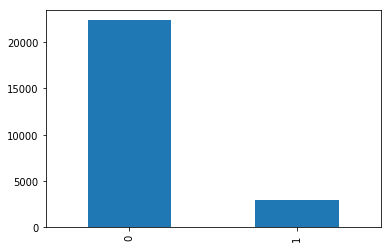

In [17]:
data['y'].value_counts().plot(kind='bar');

关键列表示客户是否会订购定期存款业务，其中`1`（订购）的占比约为11.7%，远低于未订购客户。

- `ID`

In [115]:
# 将ID删除
# data = data.drop('ID',axis=1)
# 将ID转换为索引
data = data.set_index('ID')

- age

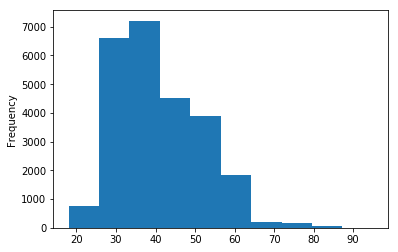

In [22]:
# 绘制直方图
data['age'].plot(kind='hist');

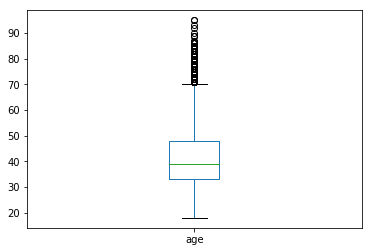

In [23]:
# 绘制箱线图
data['age'].plot(kind='box');

年龄主要分布在25-65之间，有少量的离群值。

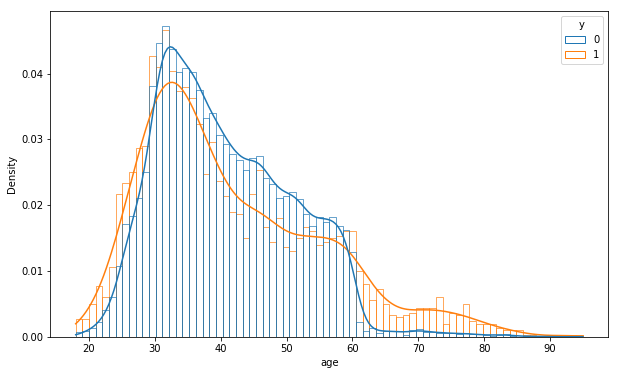

In [37]:
# age与y之间的关系
# 设置图像大小
plt.figure(figsize=(10,6))
# 设置可视化
sns.histplot(x='age',hue='y',data=data,kde=True,stat="density", common_norm=False,fill=False);

上图所示为按照类别归一化后的分布图，我们可以发现，对于参与活动的客户来说，分布在30岁以下及60岁以上的概率要比未参与活动的客户高。

**解析：**
- 由于两种类别的客户数量上相差较多，所以，我们需要从不同年龄的占比上去分析对比会更合适，否则的话，参与活动的客户在各个年龄层肯定都是远小于未参与活动客户的；
- 使用`seaborn`中的`histplot`函数绘制直方图，并设置参数：
    - `kde=True`： 显示核密度估计曲线
    - `stat="density"`： 设置统计方式为 密度，也就是直方图的面积为1
    - `common_norm=False`： 设置按照类别进行归一化
    - `fill=False`： 去除直方图中柱子的颜色填充

**参考：**
- [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
    

In [146]:
# 因为还有其他数值型变量，所以，为了避免重复写代码，我们可以使用函数的形式对如上分析进行封装
def numerical_eda(col_name):
    '''
    对数值型变量进行探索性分析，返回该变量的分布直方图、箱线图及其与关键列y之间的关系
    col_name: str, 待分析的列名
    '''
    # 设置图像大小
    plt.figure(figsize=(10,10))
    # 添加子图1，hist
    ax1 = plt.subplot(221)
    data[col_name].plot(kind='hist',title=f'{col_name}分布直方图',ax=ax1)
    # 添加子图2，box
    ax2 = plt.subplot(222)
    data[col_name].plot(kind='box',title=f'{col_name}分布箱线图',ax=ax2)
    # 添加子图3，关系hist
    ax3 = plt.subplot(212)
    sns.histplot(x=col_name,hue='y',data=data,kde=True,
                 stat="density", common_norm=False,fill=False,ax=ax3)
    ax3.set_title('与关键列关系')
    plt.suptitle(f'{col_name}分析');

**解析：**
- 使用`plt.subplot`设置子图，由于只有三幅图，所以我们可以将上面两幅作为为2x2（2行2列）的两个子图，而下方的图作为2x1（2行1列）的第二个子图；

**参考：**
- [Matplotlib另一种添加子图的方法](https://www.capallen.top/2018/Matplotlib可视化.html#另一种添加子图的方法)

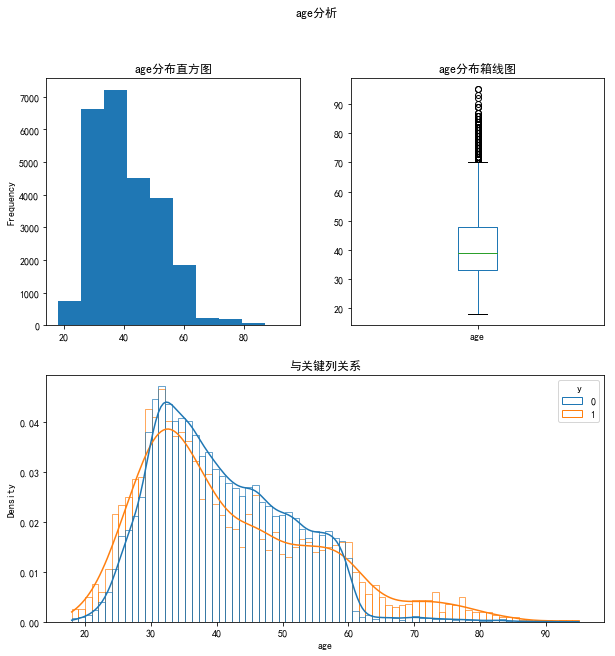

In [147]:
# 用age测试代码
numerical_eda('age')

- job

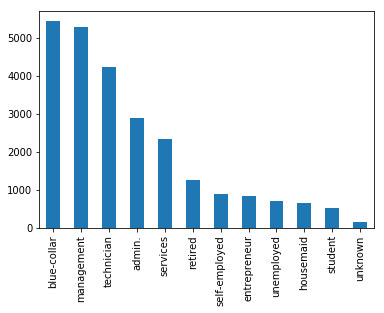

In [24]:
# 查看不同工作的数量
data['job'].value_counts().plot(kind='bar');

- blue-collar，management，technician数量较多；
- unknown，student，housemaid等数量较少；
- 考虑可以将部分类型进行归并等。

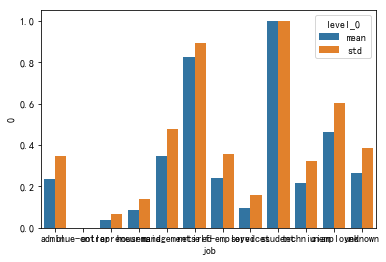

In [97]:
sns.barplot(x='job',y=0,hue='level_0',data=tmp)

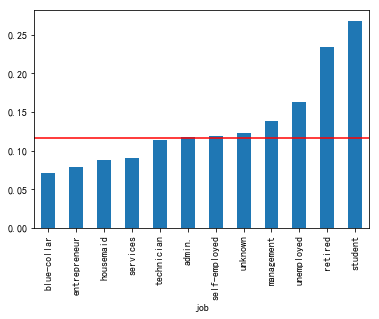

In [82]:
# 与关键列关系
# 聚合后均值
data.groupby('job')['y'].mean().sort_values().plot(kind='bar')
# 绘制全部数据的均值
plt.axhline(y=data['y'].mean(),color='red');

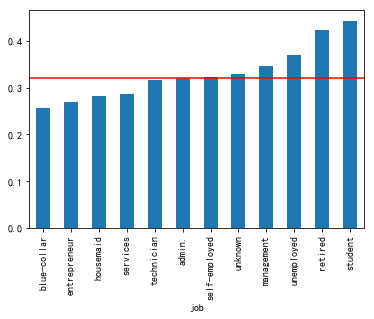

In [83]:
# 聚合后标准差
data.groupby('job')['y'].std().sort_values().plot(kind='bar')
# 绘制全部数据的标准差
plt.axhline(y=data['y'].std(),color='red');

我们可以按照各个类目的数值与总体数据数值的关系，分为三类，即低于总体均值、接近总体均值与大于总体均值。

In [157]:
# 将上面两图合并，并封装为函数
def categorical_eda(col_name):
    '''
    对类别型变量进行探索性分析，返回该变量中各类目的数量及其与关键列y之间的关系
    col_name: str, 待分析的列名
    '''
    # 设置图像大小
    plt.figure(figsize=(10, 5))
    # 添加子图1，各类目的数量
    ax1 = plt.subplot(121)
    data[col_name].value_counts().plot(
        kind='bar', title=f'{col_name}各类目数量', ax=ax1)
    # 添加子图2，与y关系
    ax2 = plt.subplot(122)
    # 计算按照col_name聚合后，y的均值及标准差
    mean_std = data.groupby(col_name)['y'].describe()[['mean', 'std']]
    # 获取顺序
    order = mean_std.sort_values(by='mean').index
    # 如果是月份列的话，则按照月份进行排序
    if col_name == 'month':
        order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                 'jul', 'aug', 'sep', 'oct', 'nov',  'dec']
    # 对数据进行reshape，便于可视化
    mean_std = mean_std.unstack().reset_index()
    # 重命名列
    mean_std = mean_std.rename(columns={'level_0': '统计项', 0: '值'})
    # 可视化
    sns.barplot(x=col_name, y='值', hue='统计项',
                order=order, data=mean_std, ax=ax2)
    # 绘制全部数据的均值
    plt.axhline(y=data['y'].mean(), color='#3274A1')
    # 绘制全部数据的标准差
    plt.axhline(y=data['y'].std(), color='#E1812C')
    # 旋转轴标签
    plt.xticks(rotation=90)
    ax2.set_title('与关键列关系')
    plt.suptitle(f'{col_name}分析')

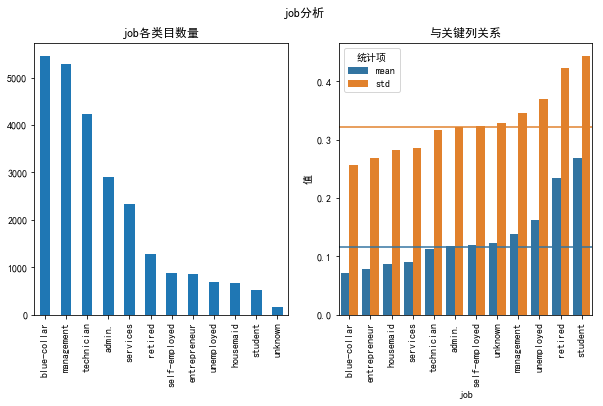

In [112]:
categorical_eda('job')

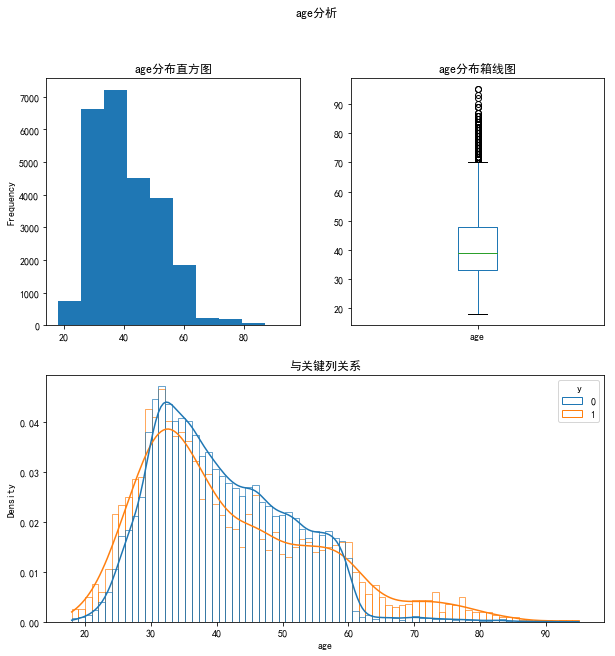

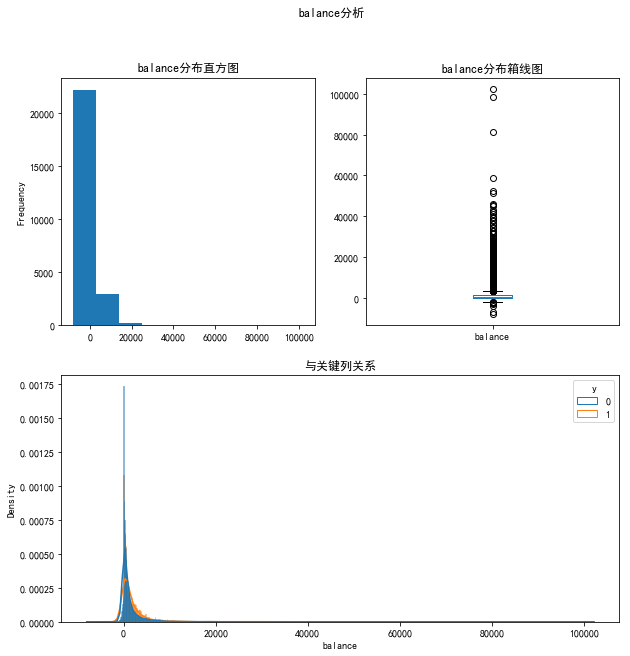

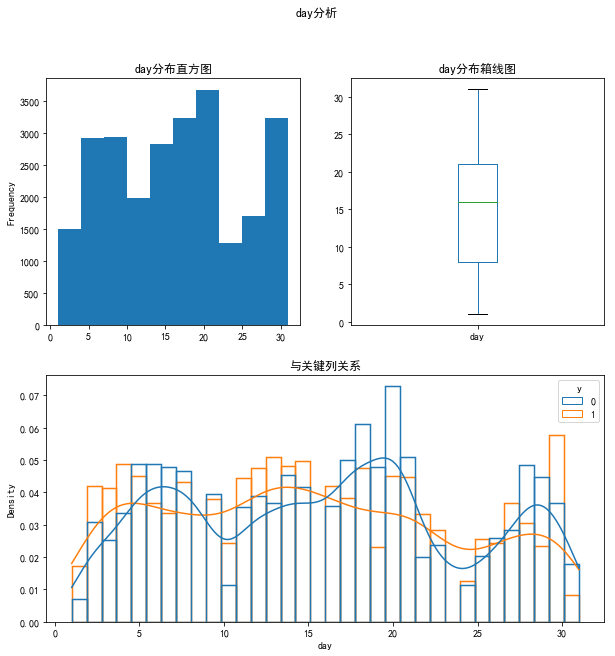

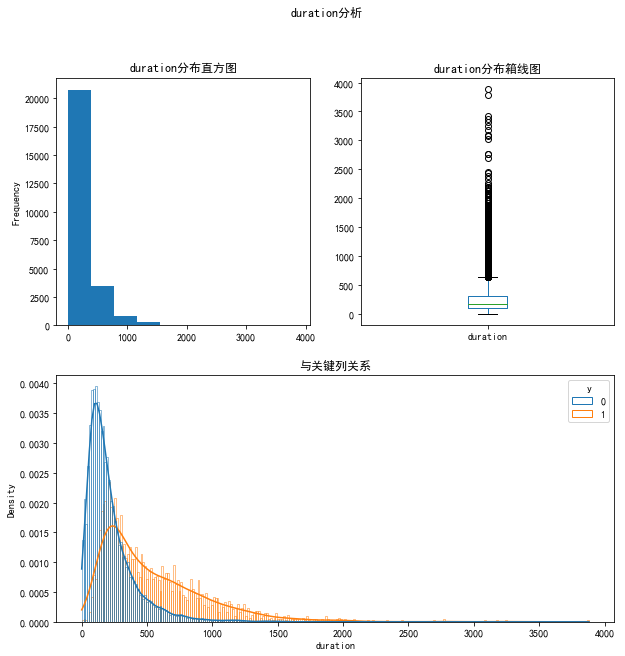

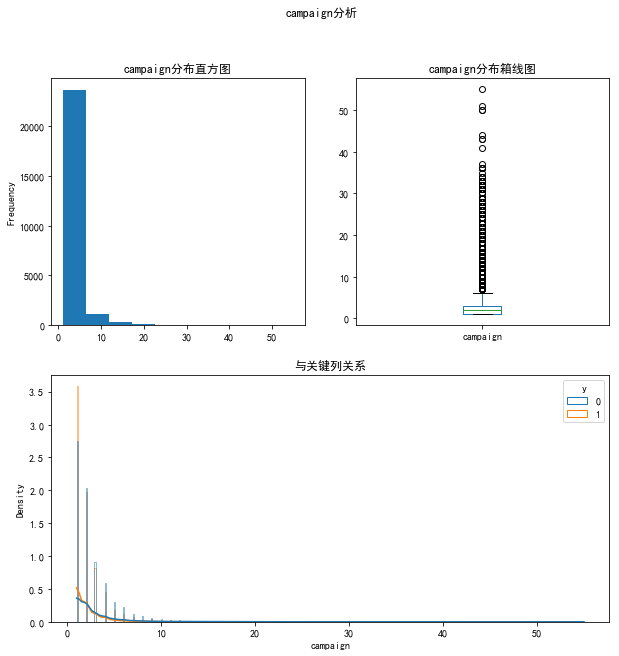

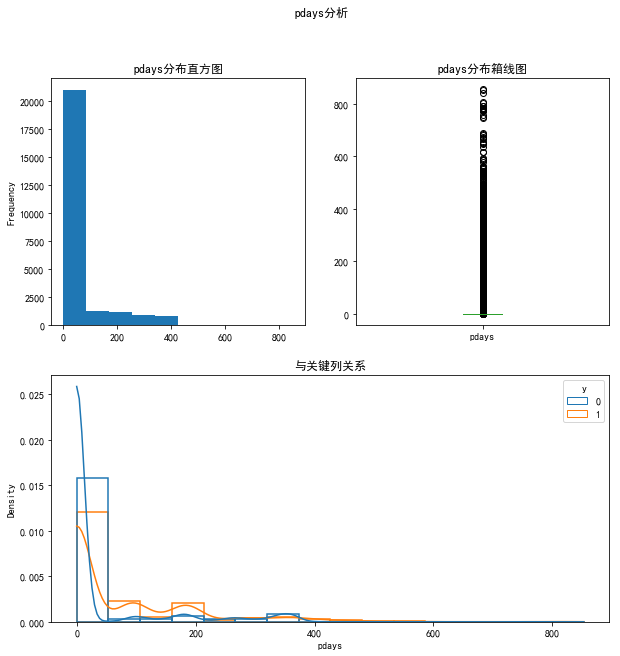

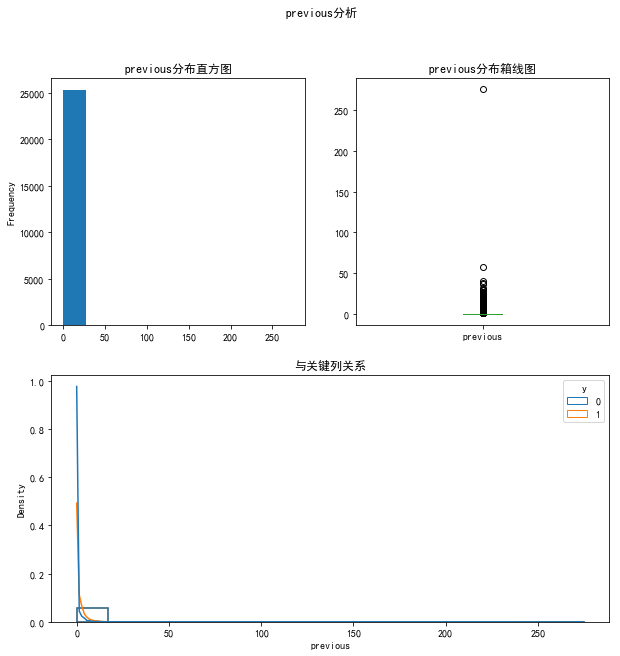

In [155]:
# 筛选出数值变量
num_cols = [col for col in data.columns if col not in list(cate_cols)+['y']]

# 使用for循环简化代码
for col in num_cols:
    numerical_eda(col)

总结：
- 部分列由于分布较为分散（如`balance`等），可视化的可读性不高，可以使用**对数轴**，重新进行可视化；
- 对于`duration`，即最后一次交流时长，我们发现订购定期存款业务的客户在大于250的范围内，有更高的比例；
- 部分列中的离群值较多，可以考虑截断处理。

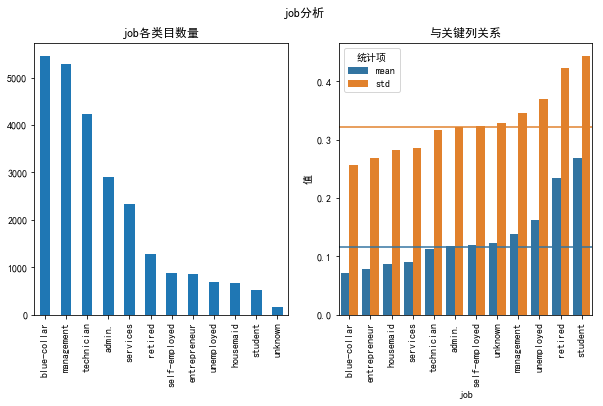

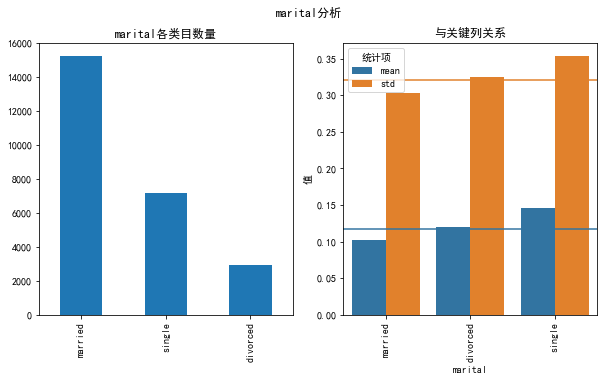

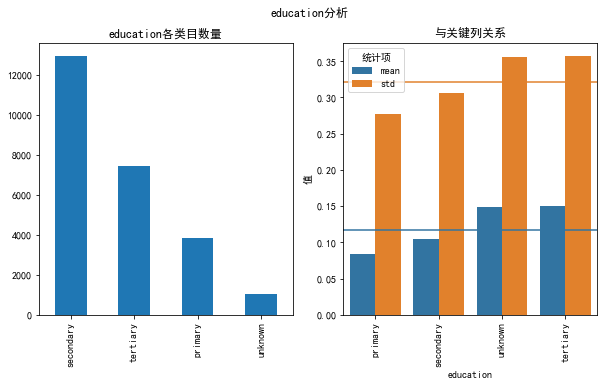

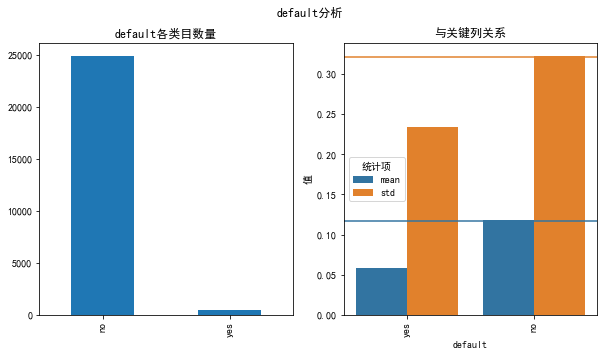

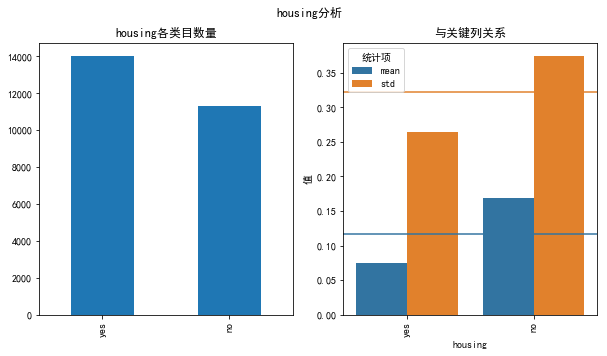

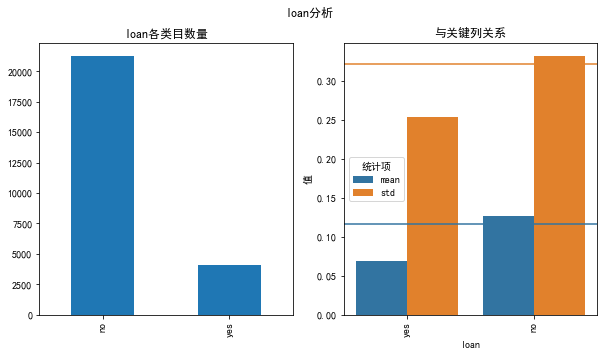

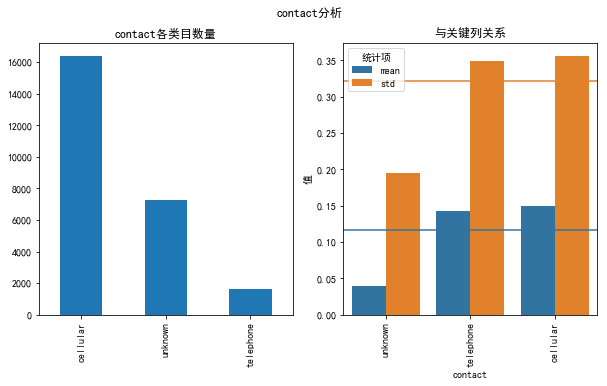

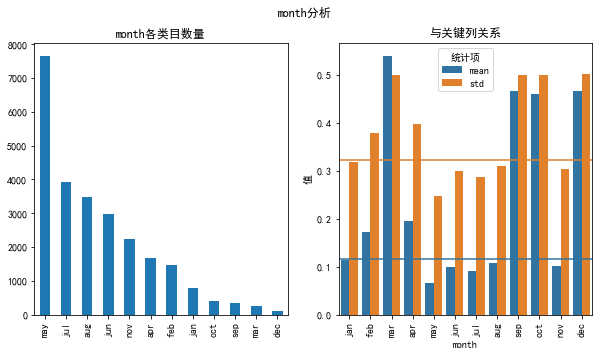

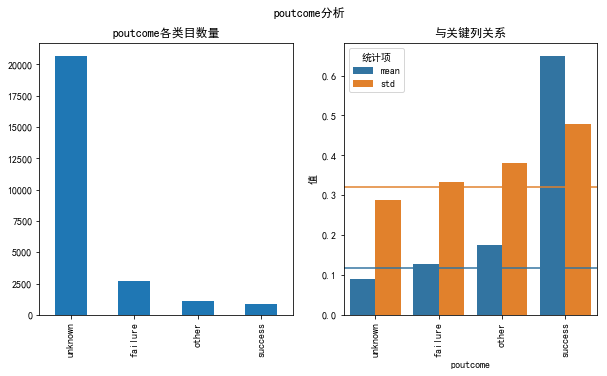

In [158]:
# 使用for循环简化代码
for col in cate_cols:
    categorical_eda(col)

总结：
- 对于`month`，五月份的占比最高，但均值最低；三、九、十、十二的占比最低，但均值最高；
- 对于`contact`，`telephone`与`cellular`对应的数据相似，但与`unknown`有很大区别；
- 对于`month`，`success`对应的均值最高，其余三项相当。

### 数据清洗

- 由于并未发现数据中存在数据类型错误、重复值、重复表达等情况存在，只是个别列存在较多的离群值，而离群值的处理方式较多，且对模型影响较大，所以我们可以将其放到特征工程部分去进行处理；
- 数据中存在的`unknown`应该当作缺失值，这部分同样在特征工程中再处理。

## 特征工程

In [160]:
# 备份数据
data_for_model = data.copy()

### 离群值的处理

In [170]:
# 离群值检测
def deal_outlier(col,method='clip'):
    '''
    处理某列中的离群值
    col: str, 待处理的列名
    method: str, 离群值处理方法。
            clip: 将离群值填充为计算后的最小或最大值；
            mean: 将离群值填充为均值；
            num: 将离群值填充为-1；
    '''
    # 计算第一与第三四分位数
    Q1 = data_for_model[col].quantile(0.25)
    Q3 = data_for_model[col].quantile(0.75)
    # 计算四分位差
    IQR = Q3 - Q1
    # 最小值
    Min = Q1 - 1.5 * IQR
    # 最大值
    Max = Q3 + 1.5 * IQR
    # 处理离群值
    if method == 'clip':
        col_data = data_for_model[col].clip(Min,Max)
    else:
        col_data = data_for_model[col]
        if method == 'mean':
            col_data[(col_data < Min)|(col_data > Max)] = col_data[(col_data >= Min)&(col_data <= Max)].mean()
        elif method == 'num':
            col_data[(col_data < Min)|(col_data > Max)] = -1
        else:
            raise MethodError("method只能是clip,mean及num中的其中一个。")
            
    # 对处理后的数据进行可视化
    col_data.plot(kind='hist',title='处理后的数据分布');
    return col_data

**解析：**
- 离群值的定义:
    - 首先结合业务及常识去判断，如3m的身高，200岁的年龄等等；
    - 大于第三分位数1.5倍四分位差的值 与 小于第一分位数1.5倍四分位差的值
离群值的处理方式有很多，常见的有：
- 直接截断，并用计算后的

ID
1         291
2        3478
3         104
4        -994
5        2974
6         450
7        1716
8        -359
9         309
10       3478
11       1076
12       1035
13        473
14          0
15       3478
16       3478
17        665
18        564
19       1449
20        305
21       3478
22          3
23        169
24       -507
25        399
26        664
27        748
28        787
29       1144
30        858
         ... 
25288    1855
25289     147
25290    1046
25291    1361
25292       0
25293     590
25294    3478
25295     605
25296     572
25297    2037
25298     558
25299    2178
25300    1273
25301     219
25302     216
25303    3478
25304     791
25305    2480
25306    3478
25307     136
25308    1214
25309    2326
25310    3478
25311       1
25312    2823
25313    3478
25314     961
25315     300
25316      66
25317      40
Name: balance, Length: 25317, dtype: int64

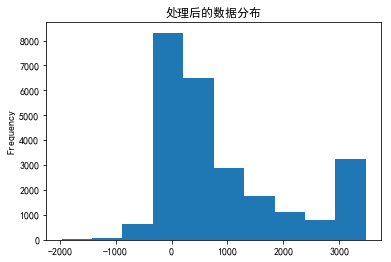

In [174]:
deal_outlier('balance')

参考：[How Are Outliers Determined in Statistics?](https://www.thoughtco.com/what-is-an-outlier-3126227#:~:text=Determining%20Outliers%20Multiplying%20the%20interquartile%20range%20%28IQR%29%20by,are%20less%20than%20this%20number%20are%20considered%20outliers.)

## 建模优化

## 业务解读